In [1]:
!pip install librosa

  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23703 sha256=0fc91c73bf281e22bf08a08e6cf6b32f0c7243df64394a1403e928cd27d90c4e
  Stored in directory: c:\users\muhammet 2.desktop-hftkvut\appdata\local\pip\cache\wheels\e4\76\a4\cfb55573167a1f5bde7d7a348e95e509c64b2c3e8f921932c3
Successfully built audioread


In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
%matplotlib inline

In [2]:
filename="C:\\Users\\Muhammet 2.DESKTOP-HFTKVUT\\Jupyter_Notebook\\Voices\\dog_bark.wav"

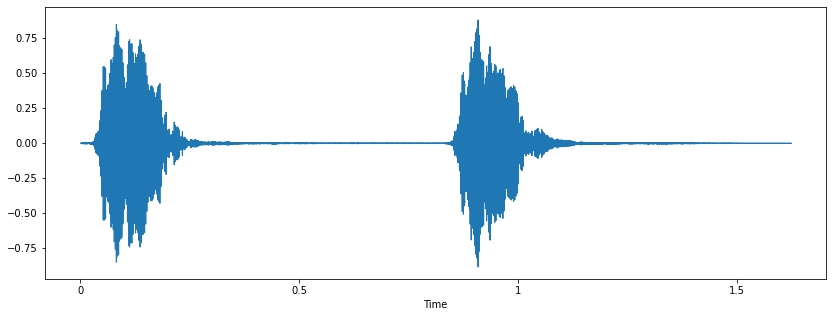

In [3]:
plt.figure(figsize=(14, 5))
data, sample_rate=librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
# ipd.Audio(filename)

In [4]:
data.shape

(35786,)

In [5]:
sample_rate

22050

In [6]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [7]:
wave_audio.shape

(71571, 2)

In [8]:
wave_sample_rate

44100

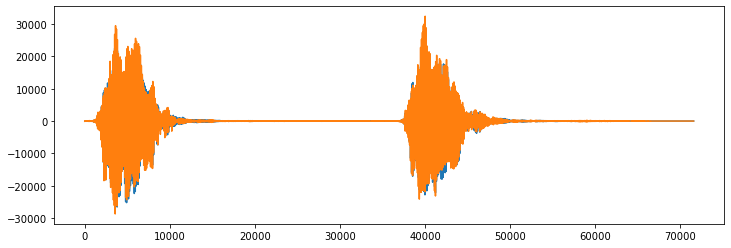

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [10]:
wave_audio.shape

(71571, 2)

In [11]:
mfccs=librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
mfccs.shape

(40, 70)

In [12]:
mfccs

array([[-4.5669318e+02, -2.4937564e+02, -1.4124490e+02, ...,
        -5.5055951e+02, -5.5072467e+02, -5.5072467e+02],
       [ 6.7272514e+01,  1.1431067e+02,  9.9852463e+01, ...,
         1.5575653e-01,  0.0000000e+00,  0.0000000e+00],
       [-1.6469845e+01, -6.7029221e+01, -8.2808258e+01, ...,
        -2.5725305e-02,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-9.0843636e-01,  7.9043140e+00,  7.4557552e+00, ...,
         2.0625192e-01,  0.0000000e+00,  0.0000000e+00],
       [ 4.6613555e+00,  5.1737800e+00, -3.5154719e+00, ...,
         1.8441860e-01,  0.0000000e+00,  0.0000000e+00],
       [-7.7435482e-01,  5.1541710e+00,  7.9361601e+00, ...,
         4.0170461e-02,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [13]:
import pandas as pd
import os
import numpy as np
audio_dataset_path="C:/Users/Muhammet 2.DESKTOP-HFTKVUT/Jupyter_Notebook/Datasets/Global AI Hub Deep Learning Bootcamp/UrbanSound8K/audio/"
metadata_path="C:/Users/Muhammet 2.DESKTOP-HFTKVUT/Jupyter_Notebook/Datasets/Global AI Hub Deep Learning Bootcamp/UrbanSound8K/metadata/"
metadata=pd.read_csv(metadata_path+"UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
metadata["slice_file_name"][0]

'100032-3-0-0.wav'

In [155]:
def features_extractor(file):
    audio, sample_rate= librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T, axis=0)
    
#     audio, sample_rate=librosa.load(file_name, res_type="kaiser_fast")
#     mfccs_features=librosa.feature.mfcc(y=audio, sr=sample_rate)
#     mfccs_scaled_features=np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [157]:
features_extractor(audio_dataset_path+"fold5/"+metadata["slice_file_name"][0]).shape

(40,)

In [158]:
from tqdm import tqdm

extracted_features=[]

for index_num, row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["fold"])+'/', str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3555it [03:02, 19.96it/s]C:\Users\Muhammet 2.DESKTOP-HFTKVUT\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [06:57, 28.85it/s]C:\Users\Muhammet 2.DESKTOP-HFTKVUT\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\Muhammet 2.DESKTOP-HFTKVUT\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [07:15, 20.03it/s]


In [162]:
extracted_features_df=pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [190]:
X=np.array(extracted_features_df["feature"].tolist())
y=np.array(extracted_features_df["class"].tolist())

In [191]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [192]:
X.shape

(8732, 40)

In [193]:
from sklearn.preprocessing import LabelEncoder
l_e=LabelEncoder()
y=np.array(pd.get_dummies(y))

In [189]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [166]:
metadata["class"].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [167]:
y.shape

(8732, 10)

In [168]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2, random_state=0)

In [169]:
X_train.shape

(6985, 40)

In [194]:
y_train.shape

(6985, 10)

In [195]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [171]:
X_test.shape

(1747, 40)

In [172]:
y_test.shape

(1747, 10)

### Model Creating

In [173]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Layer, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [175]:
num_labels=y.shape[1]

In [180]:
model=Sequential()

model.add(Dense(100,activation='relu', input_shape=(40, )))
model.add(Dropout(0.5))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(200, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

In [181]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               4100      
                                                                 
 dropout_22 (Dropout)        (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 200)               20200     
                                                                 
 dropout_23 (Dropout)        (None, 200)               0         
                                                                 
 dense_32 (Dense)            (None, 100)               20100     
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_33 (Dense)            (None, 10)               

In [182]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

In [183]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=1000
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                            verbose=1, save_best_only=True)
start=datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

duration=datetime.now()-start
print(f"Training completed in time: {duration}")

Epoch 1/1000
219/219 [==============================] - 1s 3ms/step - loss: 12.1648 - accuracy: 0.1277 - val_loss: 2.2881 - val_accuracy: 0.1196
Epoch 2/1000
219/219 [==============================] - 1s 3ms/step - loss: 2.5907 - accuracy: 0.1181 - val_loss: 2.2709 - val_accuracy: 0.1231
Epoch 3/1000
219/219 [==============================] - 1s 3ms/step - loss: 2.3332 - accuracy: 0.1198 - val_loss: 2.2248 - val_accuracy: 0.1637
Epoch 4/1000
219/219 [==============================] - 1s 3ms/step - loss: 2.2718 - accuracy: 0.1437 - val_loss: 2.1934 - val_accuracy: 0.1620
Epoch 5/1000
219/219 [==============================] - 1s 3ms/step - loss: 2.2105 - accuracy: 0.1603 - val_loss: 2.1326 - val_accuracy: 0.1797
Epoch 6/1000
219/219 [==============================] - 1s 3ms/step - loss: 2.1690 - accuracy: 0.1822 - val_loss: 2.1068 - val_accuracy: 0.1900
Epoch 7/1000
219/219 [==============================] - 1s 3ms/step - loss: 2.1551 - accuracy: 0.1926 - val_loss: 2.0674 - val_accuracy

219/219 [==============================] - 1s 3ms/step - loss: 1.0727 - accuracy: 0.6414 - val_loss: 0.9049 - val_accuracy: 0.6995
Epoch 58/1000
219/219 [==============================] - 1s 3ms/step - loss: 1.0903 - accuracy: 0.6315 - val_loss: 0.8957 - val_accuracy: 0.7172
Epoch 59/1000
219/219 [==============================] - 1s 3ms/step - loss: 1.0846 - accuracy: 0.6389 - val_loss: 0.9003 - val_accuracy: 0.7138
Epoch 60/1000
219/219 [==============================] - 1s 3ms/step - loss: 1.0747 - accuracy: 0.6366 - val_loss: 0.8784 - val_accuracy: 0.7235
Epoch 61/1000
219/219 [==============================] - 1s 3ms/step - loss: 1.0703 - accuracy: 0.6366 - val_loss: 0.8672 - val_accuracy: 0.7344
Epoch 62/1000
219/219 [==============================] - 1s 3ms/step - loss: 1.0734 - accuracy: 0.6409 - val_loss: 0.8616 - val_accuracy: 0.7201
Epoch 63/1000
219/219 [==============================] - 1s 3ms/step - loss: 1.0422 - accuracy: 0.6445 - val_loss: 0.8507 - val_accuracy: 0.7378

219/219 [==============================] - 1s 3ms/step - loss: 0.9383 - accuracy: 0.6832 - val_loss: 0.7636 - val_accuracy: 0.7848
Epoch 114/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.9287 - accuracy: 0.6846 - val_loss: 0.7363 - val_accuracy: 0.7790
Epoch 115/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.9400 - accuracy: 0.6889 - val_loss: 0.7411 - val_accuracy: 0.7682
Epoch 116/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.9321 - accuracy: 0.6918 - val_loss: 0.7382 - val_accuracy: 0.7710
Epoch 117/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.9118 - accuracy: 0.6995 - val_loss: 0.7405 - val_accuracy: 0.7762
Epoch 118/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.9264 - accuracy: 0.6938 - val_loss: 0.7724 - val_accuracy: 0.7596
Epoch 119/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.9164 - accuracy: 0.6926 - val_loss: 0.7526 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.8843 - accuracy: 0.7124 - val_loss: 0.7170 - val_accuracy: 0.7831
Epoch 170/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8793 - accuracy: 0.7141 - val_loss: 0.6925 - val_accuracy: 0.7922
Epoch 171/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.8727 - accuracy: 0.7055 - val_loss: 0.6995 - val_accuracy: 0.7962
Epoch 172/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8842 - accuracy: 0.7024 - val_loss: 0.7219 - val_accuracy: 0.7859
Epoch 173/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.8918 - accuracy: 0.7034 - val_loss: 0.7034 - val_accuracy: 0.7899
Epoch 174/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8656 - accuracy: 0.7157 - val_loss: 0.6822 - val_accuracy: 0.8025
Epoch 175/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.8744 - accuracy: 0.7108 - val_loss: 0.6895 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.8394 - accuracy: 0.7253 - val_loss: 0.6821 - val_accuracy: 0.8019
Epoch 226/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8601 - accuracy: 0.7135 - val_loss: 0.6993 - val_accuracy: 0.7831
Epoch 227/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.8441 - accuracy: 0.7233 - val_loss: 0.6769 - val_accuracy: 0.7899
Epoch 228/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.8522 - accuracy: 0.7178 - val_loss: 0.6874 - val_accuracy: 0.7916
Epoch 229/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.8640 - accuracy: 0.7180 - val_loss: 0.7087 - val_accuracy: 0.7876
Epoch 230/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8743 - accuracy: 0.7115 - val_loss: 0.6921 - val_accuracy: 0.7979
Epoch 231/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8609 - accuracy: 0.7135 - val_loss: 0.6858 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.8075 - accuracy: 0.7326 - val_loss: 0.6384 - val_accuracy: 0.8002
Epoch 282/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8273 - accuracy: 0.7258 - val_loss: 0.6627 - val_accuracy: 0.7985
Epoch 283/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8190 - accuracy: 0.7320 - val_loss: 0.6500 - val_accuracy: 0.8088
Epoch 284/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8055 - accuracy: 0.7326 - val_loss: 0.6454 - val_accuracy: 0.8048
Epoch 285/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8438 - accuracy: 0.7258 - val_loss: 0.6570 - val_accuracy: 0.7916
Epoch 286/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8332 - accuracy: 0.7213 - val_loss: 0.6664 - val_accuracy: 0.8025
Epoch 287/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.8424 - accuracy: 0.7290 - val_loss: 0.6373 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.8033 - accuracy: 0.7354 - val_loss: 0.6785 - val_accuracy: 0.7928
Epoch 338/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8177 - accuracy: 0.7343 - val_loss: 0.6295 - val_accuracy: 0.8111
Epoch 339/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8261 - accuracy: 0.7296 - val_loss: 0.6514 - val_accuracy: 0.7968
Epoch 340/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8178 - accuracy: 0.7334 - val_loss: 0.6493 - val_accuracy: 0.8037
Epoch 341/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8143 - accuracy: 0.7300 - val_loss: 0.6425 - val_accuracy: 0.8134
Epoch 342/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8086 - accuracy: 0.7347 - val_loss: 0.6368 - val_accuracy: 0.8094
Epoch 343/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7930 - accuracy: 0.7393 - val_loss: 0.6359 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.8029 - accuracy: 0.7363 - val_loss: 0.6385 - val_accuracy: 0.7922
Epoch 394/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7805 - accuracy: 0.7476 - val_loss: 0.6234 - val_accuracy: 0.8191
Epoch 395/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7881 - accuracy: 0.7384 - val_loss: 0.6283 - val_accuracy: 0.8077
Epoch 396/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7950 - accuracy: 0.7396 - val_loss: 0.6249 - val_accuracy: 0.8019
Epoch 397/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7748 - accuracy: 0.7467 - val_loss: 0.6142 - val_accuracy: 0.8145
Epoch 398/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7890 - accuracy: 0.7403 - val_loss: 0.6222 - val_accuracy: 0.8180
Epoch 399/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8069 - accuracy: 0.7404 - val_loss: 0.6148 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.7699 - accuracy: 0.7446 - val_loss: 0.6010 - val_accuracy: 0.8168
Epoch 450/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7982 - accuracy: 0.7437 - val_loss: 0.6343 - val_accuracy: 0.7991
Epoch 451/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.8275 - accuracy: 0.7344 - val_loss: 0.6158 - val_accuracy: 0.8134
Epoch 452/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7648 - accuracy: 0.7475 - val_loss: 0.6050 - val_accuracy: 0.8174
Epoch 453/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7805 - accuracy: 0.7432 - val_loss: 0.6198 - val_accuracy: 0.8145
Epoch 454/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7961 - accuracy: 0.7387 - val_loss: 0.6200 - val_accuracy: 0.8025
Epoch 455/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.8046 - accuracy: 0.7343 - val_loss: 0.6442 - val_accuracy: 

219/219 [==============================] - 1s 2ms/step - loss: 0.7630 - accuracy: 0.7549 - val_loss: 0.6181 - val_accuracy: 0.8077
Epoch 506/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7726 - accuracy: 0.7450 - val_loss: 0.6270 - val_accuracy: 0.8082
Epoch 507/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7743 - accuracy: 0.7509 - val_loss: 0.6250 - val_accuracy: 0.8014
Epoch 508/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7594 - accuracy: 0.7529 - val_loss: 0.6323 - val_accuracy: 0.8105
Epoch 509/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7672 - accuracy: 0.7424 - val_loss: 0.6260 - val_accuracy: 0.8128
Epoch 510/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7839 - accuracy: 0.7469 - val_loss: 0.6185 - val_accuracy: 0.8157
Epoch 511/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7691 - accuracy: 0.7479 - val_loss: 0.6175 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.7770 - accuracy: 0.7539 - val_loss: 0.6302 - val_accuracy: 0.8077
Epoch 562/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7569 - accuracy: 0.7583 - val_loss: 0.6115 - val_accuracy: 0.8191
Epoch 563/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7687 - accuracy: 0.7520 - val_loss: 0.6242 - val_accuracy: 0.8077
Epoch 564/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7747 - accuracy: 0.7435 - val_loss: 0.6389 - val_accuracy: 0.8014
Epoch 565/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7683 - accuracy: 0.7503 - val_loss: 0.6336 - val_accuracy: 0.8042
Epoch 566/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7605 - accuracy: 0.7492 - val_loss: 0.5982 - val_accuracy: 0.8151
Epoch 567/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7595 - accuracy: 0.7562 - val_loss: 0.6163 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.7675 - accuracy: 0.7506 - val_loss: 0.6134 - val_accuracy: 0.8191
Epoch 618/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7623 - accuracy: 0.7522 - val_loss: 0.6242 - val_accuracy: 0.8048
Epoch 619/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7716 - accuracy: 0.7485 - val_loss: 0.6188 - val_accuracy: 0.8088
Epoch 620/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7660 - accuracy: 0.7525 - val_loss: 0.6112 - val_accuracy: 0.8031
Epoch 621/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7346 - accuracy: 0.7558 - val_loss: 0.6201 - val_accuracy: 0.8145
Epoch 622/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7758 - accuracy: 0.7477 - val_loss: 0.6153 - val_accuracy: 0.8140
Epoch 623/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7460 - accuracy: 0.7497 - val_loss: 0.6099 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.7829 - accuracy: 0.7515 - val_loss: 0.5989 - val_accuracy: 0.8145
Epoch 674/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7365 - accuracy: 0.7638 - val_loss: 0.6017 - val_accuracy: 0.8180
Epoch 675/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7737 - accuracy: 0.7508 - val_loss: 0.6074 - val_accuracy: 0.8203
Epoch 676/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7450 - accuracy: 0.7598 - val_loss: 0.5909 - val_accuracy: 0.8157
Epoch 677/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7588 - accuracy: 0.7473 - val_loss: 0.6017 - val_accuracy: 0.8191
Epoch 678/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7639 - accuracy: 0.7552 - val_loss: 0.6073 - val_accuracy: 0.8197
Epoch 679/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7545 - accuracy: 0.7563 - val_loss: 0.5909 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.7630 - accuracy: 0.7510 - val_loss: 0.5946 - val_accuracy: 0.8180
Epoch 730/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7567 - accuracy: 0.7539 - val_loss: 0.6042 - val_accuracy: 0.8197
Epoch 731/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7570 - accuracy: 0.7549 - val_loss: 0.5904 - val_accuracy: 0.8248
Epoch 732/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7385 - accuracy: 0.7581 - val_loss: 0.5967 - val_accuracy: 0.8128
Epoch 733/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7580 - accuracy: 0.7499 - val_loss: 0.6105 - val_accuracy: 0.8168
Epoch 734/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7898 - accuracy: 0.7480 - val_loss: 0.6206 - val_accuracy: 0.8077
Epoch 735/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7521 - accuracy: 0.7513 - val_loss: 0.5953 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.7488 - accuracy: 0.7648 - val_loss: 0.6225 - val_accuracy: 0.8077
Epoch 786/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7707 - accuracy: 0.7515 - val_loss: 0.6198 - val_accuracy: 0.8042
Epoch 787/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7369 - accuracy: 0.7563 - val_loss: 0.5945 - val_accuracy: 0.8197
Epoch 788/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7373 - accuracy: 0.7565 - val_loss: 0.5924 - val_accuracy: 0.8208
Epoch 789/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7305 - accuracy: 0.7583 - val_loss: 0.6221 - val_accuracy: 0.8065
Epoch 790/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7740 - accuracy: 0.7568 - val_loss: 0.6287 - val_accuracy: 0.8134
Epoch 791/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7623 - accuracy: 0.7559 - val_loss: 0.6023 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.7618 - accuracy: 0.7609 - val_loss: 0.6202 - val_accuracy: 0.8140
Epoch 842/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7204 - accuracy: 0.7638 - val_loss: 0.6049 - val_accuracy: 0.8111
Epoch 843/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7473 - accuracy: 0.7623 - val_loss: 0.6168 - val_accuracy: 0.8220
Epoch 844/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7466 - accuracy: 0.7556 - val_loss: 0.6033 - val_accuracy: 0.8071
Epoch 845/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7341 - accuracy: 0.7644 - val_loss: 0.5840 - val_accuracy: 0.8226
Epoch 846/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7402 - accuracy: 0.7601 - val_loss: 0.5969 - val_accuracy: 0.8185
Epoch 847/1000
219/219 [==============================] - 1s 4ms/step - loss: 0.7231 - accuracy: 0.7603 - val_loss: 0.6047 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.7309 - accuracy: 0.7598 - val_loss: 0.5994 - val_accuracy: 0.8122
Epoch 898/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7305 - accuracy: 0.7612 - val_loss: 0.5948 - val_accuracy: 0.8214
Epoch 899/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7586 - accuracy: 0.7613 - val_loss: 0.6088 - val_accuracy: 0.8174
Epoch 900/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7470 - accuracy: 0.7616 - val_loss: 0.6453 - val_accuracy: 0.7968
Epoch 901/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7525 - accuracy: 0.7585 - val_loss: 0.6188 - val_accuracy: 0.8117
Epoch 902/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7409 - accuracy: 0.7539 - val_loss: 0.6073 - val_accuracy: 0.8077
Epoch 903/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7573 - accuracy: 0.7585 - val_loss: 0.5877 - val_accuracy: 

219/219 [==============================] - 1s 3ms/step - loss: 0.7462 - accuracy: 0.7649 - val_loss: 0.6123 - val_accuracy: 0.8122
Epoch 954/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7467 - accuracy: 0.7571 - val_loss: 0.5921 - val_accuracy: 0.8214
Epoch 955/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7314 - accuracy: 0.7671 - val_loss: 0.6017 - val_accuracy: 0.8185
Epoch 956/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7493 - accuracy: 0.7568 - val_loss: 0.6401 - val_accuracy: 0.8082
Epoch 957/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.7251 - accuracy: 0.7599 - val_loss: 0.6115 - val_accuracy: 0.8117
Epoch 958/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7347 - accuracy: 0.7628 - val_loss: 0.6228 - val_accuracy: 0.8054
Epoch 959/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.7334 - accuracy: 0.7623 - val_loss: 0.6074 - val_accuracy: 

In [198]:
model.predict_features(features_extractor(audio_dataset_path+"fold5/"+metadata["slice_file_name"][0]).reshape(1, -1))

AttributeError: 'Sequential' object has no attribute 'predict_features'

In [161]:
filename=audio_dataset_path+"fold5/"+metadata["slice_file_name"][0]
audio, sample_rate= librosa.load(filename, res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio, sr=sample_rate)
mfccs_scaled_features=np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1, -1)
print(f"mfccs_scaled_features:\n{mfccs_scaled_features}")
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
prediction_class=l_e.inverse_transform(predicted_label)
print(prediction_class)

[-217.35526     70.22338   -130.38527    -53.282898   -21.199127
  -22.677624   -10.855972    18.294254     6.6527023   14.324023
  -12.16768      2.2768364  -17.779188    10.388948    -6.5828347
   -0.6944589  -18.336023     1.9942526   -5.1433306    8.3024   ]
mfccs_scaled_features:
[[-217.35526     70.22338   -130.38527    -53.282898   -21.199127
   -22.677624   -10.855972    18.294254     6.6527023   14.324023
   -12.16768      2.2768364  -17.779188    10.388948    -6.5828347
    -0.6944589  -18.336023     1.9942526   -5.1433306    8.3024   ]]
(1, 20)
1/1 [==============================] - 0s 16ms/step
[[5.6874001e-08 8.3569124e-05 7.8505516e-04 9.8376334e-01 4.8348713e-03
  7.4680690e-07 6.9001205e-03 7.0583974e-09 3.5004609e-03 1.3172143e-04]]


NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [154]:
ipd.Audio(filename)